In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-35.76486703690362 78.0072579981038
-52.26616997337228 -12.991767200675525
-60.93485387370106 118.36249978128495
13.545756783435351 -148.07555299826262
-73.97883142364873 -26.685971051962753
72.83283593262661 104.49848774073939
20.062554111573007 -132.98843540156184
3.6908652430398092 156.59072947672576
-19.665239187795677 -164.40537108273878
58.90834542181105 5.459298813758721
-77.76716001907334 -48.30355707216063
30.152584259692432 -168.69528613652443
-87.49650340800534 -116.41684360640076
83.78848930058538 -99.76192332037795
-78.02208812115731 -58.87407602572772
21.65909584280797 53.95829745147435
86.56871133841474 -173.4727666653403
-13.038494409992964 70.99084349397978
15.705051742887278 -178.85860941292384
-47.495555339499845 -117.55242220734421
49.17720672486624 -35.64603513563864
21.257079706120948 176.49654885252255
-20.62171982833972 137.4418658734191
-79.65526730735766 117.51182088978499
63.49444179742645 161.39323680454902
60.760939214296656 57.32020906129665
-71.8578825742

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create list for weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Create url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create 1500 random latitude and longitude coordinates 
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [12]:
# Add coordinates to a list 
coordinates_lst = list(coordinates)

In [13]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

610

In [14]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | griffith
Processing Record 2 of Set 1 | lasa
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | obama
Processing Record 6 of Set 1 | vershino-darasunskiy
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | aykhal
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | laurel
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | codajas
Processing Record 16 of Set 1 | klaksvik
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | comodoro rivadavia
Processing Record 21 of Set 1 | yulara
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | akureyri
Processing Record 24 of Set 1 | bluff
Processing Record 25 of

Processing Record 39 of Set 4 | quatre cocos
Processing Record 40 of Set 4 | huron
Processing Record 41 of Set 4 | saint-pierre
Processing Record 42 of Set 4 | himora
City not found. Skipping
Processing Record 43 of Set 4 | brattleboro
Processing Record 44 of Set 4 | tuktoyaktuk
Processing Record 45 of Set 4 | shingu
Processing Record 46 of Set 4 | marsa matruh
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | mys shmidta
City not found. Skipping
Processing Record 49 of Set 4 | kisangani
Processing Record 50 of Set 4 | zaria
Processing Record 1 of Set 5 | kuruman
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | placerville
Processing Record 4 of Set 5 | bumba
Processing Record 5 of Set 5 | iqaluit
Processing Record 6 of Set 5 | mahebourg
Processing Record 7 of Set 5 | kirakira
Processing Record 8 of Set 5 | hambantota
Processing Record 9 of Set 5 | lingao
Processing Record 10 of Set 5 | bulgan
Processing Record 11 of Set 5 | mitchell
Process

Processing Record 29 of Set 8 | barguzin
Processing Record 30 of Set 8 | tazovskiy
Processing Record 31 of Set 8 | fernley
Processing Record 32 of Set 8 | waterfoot
Processing Record 33 of Set 8 | sompeta
Processing Record 34 of Set 8 | komsomolskiy
Processing Record 35 of Set 8 | kuva
City not found. Skipping
Processing Record 36 of Set 8 | elko
Processing Record 37 of Set 8 | iisalmi
Processing Record 38 of Set 8 | petrokamenskoye
Processing Record 39 of Set 8 | aitape
Processing Record 40 of Set 8 | nattam
Processing Record 41 of Set 8 | havoysund
Processing Record 42 of Set 8 | moron
Processing Record 43 of Set 8 | tottori
Processing Record 44 of Set 8 | itoman
Processing Record 45 of Set 8 | siderno
Processing Record 46 of Set 8 | ankang
Processing Record 47 of Set 8 | kulhudhuffushi
Processing Record 48 of Set 8 | teknaf
Processing Record 49 of Set 8 | kaspiysk
Processing Record 50 of Set 8 | zhuhai
Processing Record 1 of Set 9 | talaya
Processing Record 2 of Set 9 | bilibino
Pro

Processing Record 16 of Set 12 | kaeng khoi
Processing Record 17 of Set 12 | ngunguru
Processing Record 18 of Set 12 | hirara
Processing Record 19 of Set 12 | ucluelet
Processing Record 20 of Set 12 | kuloy
Processing Record 21 of Set 12 | bergerac
Processing Record 22 of Set 12 | trairi
Processing Record 23 of Set 12 | praia
Processing Record 24 of Set 12 | ambodifototra
City not found. Skipping
Processing Record 25 of Set 12 | hobyo
Processing Record 26 of Set 12 | constitucion
Processing Record 27 of Set 12 | kaeo
Processing Record 28 of Set 12 | ayagoz
Processing Record 29 of Set 12 | ozgon
City not found. Skipping
Processing Record 30 of Set 12 | bur gabo
City not found. Skipping
Processing Record 31 of Set 12 | dhidhdhoo
Processing Record 32 of Set 12 | lerwick
Processing Record 33 of Set 12 | camapua
Processing Record 34 of Set 12 | port hardy
Processing Record 35 of Set 12 | porto santo
Processing Record 36 of Set 12 | vao
Processing Record 37 of Set 12 | dogondoutchi
Processin

In [15]:
len(city_data)

557

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Griffith,US,2022-05-16 06:44:35,41.5284,-87.4237,57.88,89,0,4.61
1,Lasa,IT,2022-05-16 06:44:35,46.6166,10.7002,63.70,81,26,1.39
2,Bethel,US,2022-05-16 06:44:36,41.3712,-73.4140,64.49,91,0,3.44
3,Barrow,US,2022-05-16 06:42:01,71.2906,-156.7887,21.22,86,100,16.11
4,Obama,JP,2022-05-16 06:44:36,35.4958,135.7460,67.95,59,100,4.70
5,Vershino-Darasunskiy,RU,2022-05-16 06:44:37,52.3500,115.5167,63.50,19,98,13.56
6,East London,ZA,2022-05-16 06:40:13,-33.0153,27.9116,59.94,77,0,2.30
7,Aykhal,RU,2022-05-16 06:44:37,66.0000,111.5000,36.36,100,100,5.46
8,Busselton,AU,2022-05-16 06:44:38,-33.6500,115.3333,65.39,58,1,11.43
9,Sitka,US,2022-05-16 06:44:38,57.0531,-135.3300,46.29,76,100,21.85


In [17]:
# reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']


In [18]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Griffith,US,2022-05-16 06:44:35,41.5284,-87.4237,57.88,89,0,4.61
1,Lasa,IT,2022-05-16 06:44:35,46.6166,10.7002,63.70,81,26,1.39
2,Bethel,US,2022-05-16 06:44:36,41.3712,-73.4140,64.49,91,0,3.44
3,Barrow,US,2022-05-16 06:42:01,71.2906,-156.7887,21.22,86,100,16.11
4,Obama,JP,2022-05-16 06:44:36,35.4958,135.7460,67.95,59,100,4.70
...,...,...,...,...,...,...,...,...,...
552,Roebourne,AU,2022-05-16 06:48:24,-20.7833,117.1333,80.33,41,100,8.52
553,Rudbar,AF,2022-05-16 06:48:24,30.1500,62.6000,89.49,14,0,10.83
554,La Ronge,CA,2022-05-16 06:48:25,55.1001,-105.2842,35.85,75,40,4.61
555,Malakal,SS,2022-05-16 06:48:25,9.5334,31.6605,87.73,49,15,4.21


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
#Import the time module.
import time

# Get today's date.
today = time.strftime("%x")
today

'05/16/22'

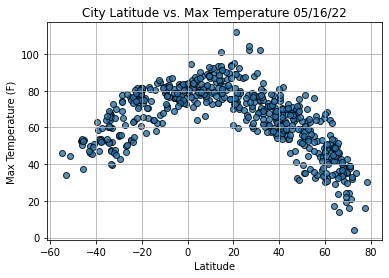

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


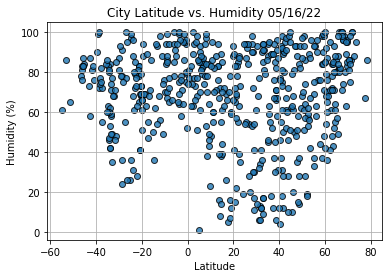

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

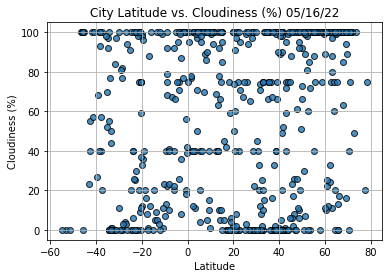

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

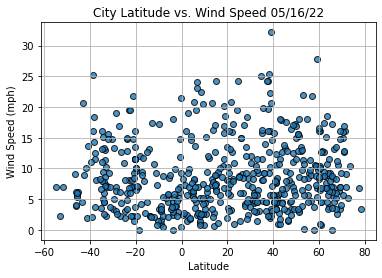

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
import pandas as pd
import requests

city_data_df= pd.read_csv('weather_data/cities.csv')
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Griffith,US,2022-05-16 06:44:35,41.5284,-87.4237,57.88,89,0,4.61
1,1,Lasa,IT,2022-05-16 06:44:35,46.6166,10.7002,63.70,81,26,1.39
2,2,Bethel,US,2022-05-16 06:44:36,41.3712,-73.4140,64.49,91,0,3.44
3,3,Barrow,US,2022-05-16 06:42:01,71.2906,-156.7887,21.22,86,100,16.11
4,4,Obama,JP,2022-05-16 06:44:36,35.4958,135.7460,67.95,59,100,4.70
...,...,...,...,...,...,...,...,...,...,...
552,552,Roebourne,AU,2022-05-16 06:48:24,-20.7833,117.1333,80.33,41,100,8.52
553,553,Rudbar,AF,2022-05-16 06:48:24,30.1500,62.6000,89.49,14,0,10.83
554,554,La Ronge,CA,2022-05-16 06:48:25,55.1001,-105.2842,35.85,75,40,4.61
555,555,Malakal,SS,2022-05-16 06:48:25,9.5334,31.6605,87.73,49,15,4.21


In [20]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                       Castro
Country                        BR
Date          2022-05-16 06:44:40
Lat                      -24.7911
Lng                      -50.0119
Max Temp                     53.2
Humidity                       97
Cloudiness                    100
Wind Speed                    3.0
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
552    False
553     True
554     True
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Griffith,US,2022-05-16 06:44:35,41.5284,-87.4237,57.88,89,0,4.61
1,1,Lasa,IT,2022-05-16 06:44:35,46.6166,10.7002,63.70,81,26,1.39
2,2,Bethel,US,2022-05-16 06:44:36,41.3712,-73.4140,64.49,91,0,3.44
3,3,Barrow,US,2022-05-16 06:42:01,71.2906,-156.7887,21.22,86,100,16.11
4,4,Obama,JP,2022-05-16 06:44:36,35.4958,135.7460,67.95,59,100,4.70


In [24]:
# create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

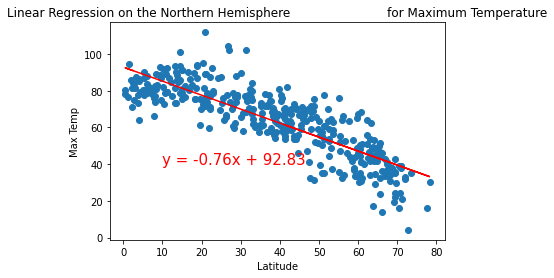

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

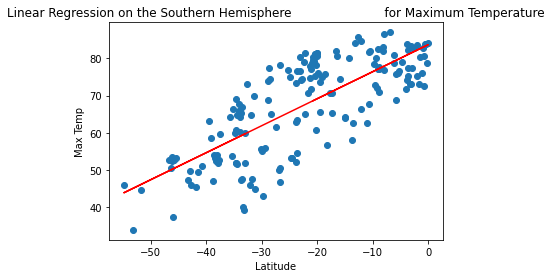

In [32]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (-50,90))

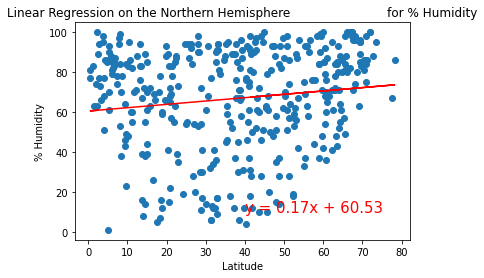

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

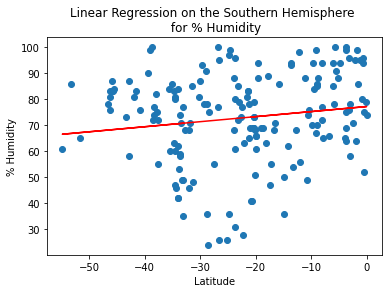

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

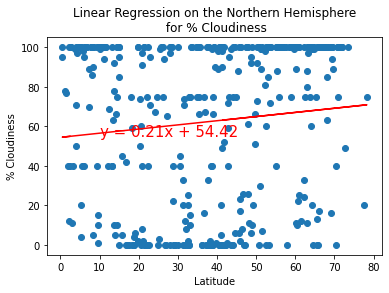

In [43]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Cloudiness", "% Cloudiness", (10,55))

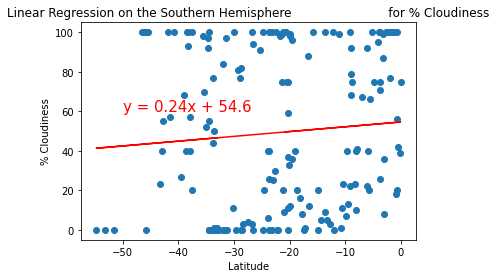

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

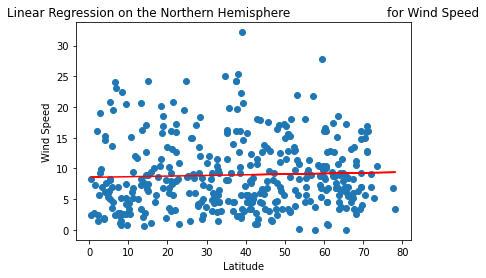

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

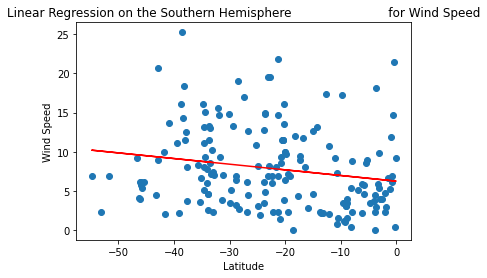

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))